<a href="https://colab.research.google.com/github/u-keigo/RRIproject1/blob/main/SVNS%E5%88%86%E9%A1%9E%E3%83%A2%E3%83%87%E3%83%AB%EF%BC%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

クリーニング要る

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# クリーニングを行う関数を定義

RRI_max = 1500
RRI_min = 350
RRI_diff = 150
dt = 0.5   # second

def read_RRI(name, RRI_max, RRI_min, RRI_diff, dt):
  nums = []  # 整数を入れるリスト

  with open(name, 'r', encoding='utf-8') as fin:  # ファイルを開く
    for line in fin.readlines():  # 行を読み込んでfor文で回す
        try:
            line = line.replace('\n','')
            num = int(float(line))  # 行を整数（int）に変換する
        except ValueError as e:
            print(e, file=sys.stderr)  # エラーが出たら画面に出力
            continue

        nums.append(num)  # 変換した整数をリストに保存する


  timecount = 0
  time_RRI = []   # 時間軸
  for i in range(len(nums)):
    timecount = timecount + nums[i]/1000  # second
    time_RRI.append(timecount)  # second


  # RRIデータのクリーニング
  # リストをnumpy配列に変換(これをしないとif文の不等号でエラーが発生する)
  time_RRI_np = np.array(time_RRI)
  nums_np = np.array(nums)

  cleaning_counter1 = 0
  RRI_cleaning = np.empty(0)
  time_RRI2 = np.empty(0)   # time_RRIから外れ値を除いたものを格納する

  for i in range(len(nums)):
    if RRI_min < nums_np[i] and nums_np[i] < RRI_max:
      RRI_cleaning = np.append(RRI_cleaning,nums_np[i]) 
      time_RRI2 = np.append(time_RRI2,time_RRI_np[i])
    else:
      cleaning_counter1 += 1  # クリーニングで消去した要素数を数える


  RRI_cleaning2 = np.empty(0)
  time_RRI3 = np.empty(0)

  cleaning_counter2 = 0
  for i in range(len(RRI_cleaning)-1):   #範囲を超えないように-1する
    if RRI_cleaning[i+1] - RRI_cleaning[i] < RRI_diff:
      RRI_cleaning2 = np.append(RRI_cleaning2,RRI_cleaning[i]) 
      time_RRI3 = np.append(time_RRI3,time_RRI2[i])
    else:
      cleaning_counter2 += 1  # クリーニングで消去した要素数を数える


  # クリーニング後のリサンプリング
  samp_len = int(time_RRI3[-1] / dt)  # サンプリング数
  # t_resamp = np.linspace(0, samp_len*int(dt*1000),int(dt*1000))   # dt:float型
  # t_resamp /= 1000   # second
  t_resamp = np.arange(0, samp_len*dt, dt)   # dt:float型

  RRI_resamp = np.interp(t_resamp, time_RRI3, RRI_cleaning2)

  print(cleaning_counter1,cleaning_counter2)

  return (t_resamp, RRI_resamp)

In [3]:
import os
from glob import glob
import pandas as pd
import linecache


# カテゴリを配列で取得
drive_dir = "/content/drive/My Drive/python/HRV_CHF/"

categories = [name for name in os.listdir(drive_dir + '24h') if os.path.isdir(drive_dir + "24h/" +name)]
print(categories)


['NS_24h', 'SV_24h']


In [5]:
import numpy as np

fix_length = 70000   # 取り出すデータ点の数
num_SV = 73   # SVファイルの数
num_NS = 45   # NSファイルの数
num_data = num_SV + num_NS   # ファイルの数

DAT = pd.DataFrame(np.zeros(shape=(fix_length, num_data)))
i=0
for cat in categories:
    path = drive_dir + "24h/" + cat + "/*.24h"
    files = glob(path)
    for text_name in files:
      t_resamp, RRI_resamp = read_RRI(text_name, RRI_max, RRI_min, RRI_diff, dt)
      data = pd.Series(RRI_resamp)
      DAT.iloc[:, i] = data
      DAT.rename(columns={i: cat}, inplace=True)
      i = i+1


# データがうまく取れている列のみ抽出
DAT2 = DAT.loc[:,['NS_24h','SV_24h']]

DAT3 = DAT2.sample(frac=1,axis=1,random_state=0).reset_index(drop=True)
DAT4 = DAT3.T
DAT4.head()

# DataFrameをドライブに保存(データの読み込みに時間がかかるのを防ぐ)

import pickle

filename = 'SVNS_df_108_70000.sav'
pickle.dump(DAT4, open(filename, 'wb'))

!cp "./{filename}" ./drive/My\ Drive/.


0 1749
0 30
0 25
0 12812
0 597
0 91
0 41
0 105
0 2586
4 13600
0 1204
0 3
0 26
0 21
0 11
0 4
0 19
0 835
0 5
0 26
0 22
0 27
0 1
181 10719
0 835
0 434
0 1469
0 135
0 6878
0 4
0 261
0 303
0 22
0 1422
0 1274
0 2
0 355
0 233
0 175
0 20
0 42
0 55
0 11
0 157
2 4267
0 81
0 34
0 110
0 14
247 3278
0 38
0 241
0 1958
1 195
0 61
0 387
0 191
0 201
3 1905
0 10544
0 6534
1256 20313
0 18
0 34
0 164
0 77
0 32
0 26
0 29
0 111
615 7336
0 3
0 128
0 10471
0 3500
0 58
0 258
0 12
0 124
0 3
0 464
0 805
0 20
0 57
0 460
0 303
0 2
0 49
0 103
0 15
0 224
0 3141
0 266
0 147
0 85
0 197
0 137
0 417
0 191
0 3966
0 307
0 716
0 11
0 81
0 0
0 115
0 89
0 5


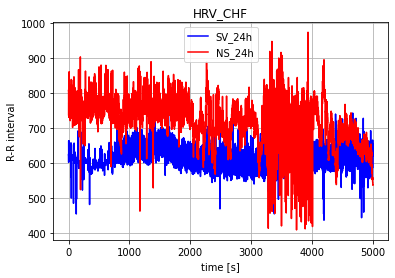

In [ ]:
import matplotlib.pyplot as plt

# データがうまく取れている列のみ抽出
DAT2 = DAT.loc[:,['NS_24h','SV_24h']]

DAT3 = DAT2.sample(frac=1,axis=1,random_state=0).reset_index(drop=True)
DAT4 = DAT3.T
DAT4.head()

time_resamp = np.arange(0, fix_length*dt,dt)   # numpy型

plt.figure()
plt.plot(time_resamp, DAT4.iloc[0], color='blue', label=DAT4.index[0])
plt.plot(time_resamp, DAT4.iloc[1], color='red', label=DAT4.index[1])
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('R-R interval')
plt.title('HRV_CHF')
plt.grid()
plt.show()

In [ ]:
# DataFrameをドライブに保存(データの読み込みに時間がかかるのを防ぐ)

import pickle

filename = 'SVNS_df_5000.sav'
pickle.dump(DAT4, open(filename, 'wb'))

!cp "./{filename}" ./drive/My\ Drive/.


NameError: ignored

In [4]:
import pickle

# DataFrameを読み込む（時間短縮）

filename = '/content/drive/MyDrive/SVNS_df_108_70000.sav'

with open(filename, 'rb') as web:
  DAT5 = pickle.load(web)   # DAT5 = DAT4

print(DAT5)
print(DAT5.isnull().sum(axis=1))
print(DAT5.index)

         0       1            2      ...        69997        69998        69999
SV_24h   624.0   624.0   619.116883  ...   767.958763   802.209524   839.434783
NS_24h   808.0   808.0   789.217391  ...   862.198198   880.216216   890.535714
SV_24h   584.0   584.0   578.222222  ...   784.000000   784.000000   792.240000
NS_24h   640.0   640.0   644.444444  ...   592.000000   578.444445   592.480000
NS_24h  1136.0  1136.0  1136.000000  ...   943.469027   921.345133   907.692308
...        ...     ...          ...  ...          ...          ...          ...
SV_24h   784.0   784.0   788.320000  ...   702.318182   695.813953   691.727273
SV_24h   608.0   608.0   597.405405  ...   544.000000   550.840580   539.462687
SV_24h   704.0   704.0   704.000000  ...   746.833333   767.666667   752.129032
SV_24h   672.0   672.0   664.000000  ...  1002.825397  1006.793651  1005.216000
SV_24h   864.0   864.0   864.000000  ...  1035.875969  1032.000000   998.942149

[108 rows x 70000 columns]
SV_24h    0


In [6]:
# 列数をnum分割するようにデータフレームをreshapeする関数
# shape(108,10000) → shape(540,2000)

import numpy as np

def df_reshape(df, num):
  M = df.shape[0]   # 108
  N = df.shape[1]   # 10000
  
  df_new = pd.DataFrame(np.zeros(shape=(int(M*num), int(N/num))))

  count = 0
  for i in range(M):   # range(3) = 0,1,2
    for j in range(num):
      df_new = df_new.rename({count:df.index[i]},axis=0)   # indexの置換
      start = int(N/num)*j
      goal = int(N/num)*(j+1)   # 1:5 = 1,2,3,4
      df_new.iloc[count] = df.iloc[i, start:goal].to_numpy()   # 値だけ抽出するためにnumpy配列に変換
      count += 1
  
  return df_new

# データの長さを1/5し、データ数を5倍する
DAT6 = df_reshape(DAT5, 14)

In [13]:
# DataFrameをドライブに保存(データの読み込みに時間がかかるのを防ぐ)

import pickle

filename = 'SVNS_df_540_2000.sav'
pickle.dump(DAT6, open(filename, 'wb'))

!cp "./{filename}" ./drive/My\ Drive/.


# DataFrameを読み込む（時間短縮）

filename = '/content/drive/MyDrive/SVNS_df_540_2000.sav'

with open(filename, 'rb') as web:
  DAT6 = pickle.load(web)   # DAT5 = DAT4

print(DAT6)
print(DAT6.isnull().sum(axis=1))
print(DAT6.index)

                 0           1           2  ...        1998        1999   index
SV_24h  624.000000  624.000000  619.116883  ...  637.200000  617.621622  SV_24h
SV_24h  613.904762  671.400000  646.400000  ...  630.457831  661.194805  SV_24h
SV_24h  622.233766  616.000000  594.888889  ...  574.422535  568.000000  SV_24h
SV_24h  579.351351  589.424658  585.405405  ...  603.384615  622.615385  SV_24h
SV_24h  617.974026  591.833333  596.923077  ...  621.832258  620.000000  SV_24h
...            ...         ...         ...  ...         ...         ...     ...
SV_24h  864.000000  864.000000  864.000000  ...  849.207547  843.542857  SV_24h
SV_24h  838.769231  833.961538  842.962963  ...  898.545455  884.909091  SV_24h
SV_24h  877.064220  872.477064  884.000000  ...  886.796460  900.070796  SV_24h
SV_24h  910.121739  918.817391  904.432432  ...  896.000000  894.788991  SV_24h
SV_24h  881.027523  875.099099  884.108108  ...  929.103448  924.765217  SV_24h

[540 rows x 2001 columns]
SV_24h    0
S

In [8]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim


category2index = {}
for cat in categories:
    if cat in category2index: continue
    category2index[cat] = len(category2index)
print(category2index)
# {'NS_24h': 0, 'SV_24h': 1}

def category2tensor(cat):
    return torch.tensor([category2index[cat]], dtype=torch.long)

# データフレームの形状変更・indexの要素化
# df = DAT5
df = DAT6
df['index'] = df.index
df.head()

dlen = len(DAT5.columns)  # 108
train_data, test_data = train_test_split(df, test_size=0.3,random_state=0)
print("train_data size: {}". format(train_data.shape))
# train_data size: (75, 2001)
print("test_data size: {}". format(test_data.shape))
# test_data size: (33, 2001)

# DataLoaderを使って、データセットを128個のミニパッチに分ける
# ミニパッチサイズを指定したデータローダを作成
train_batch = DataLoader(
    dataset = train_data,   # データセットの指定
    batch_size = 64,   # バッチサイズの指定
    shuffle = True,    # シャッフルするかどうかの指定
    num_workers = 2)   # コアの数

test_batch = DataLoader(
    dataset = test_data,   # データセットの指定
    batch_size = 32,   # バッチサイズの指定
    shuffle = False,    # シャッフルするかどうかの指定
    num_workers = 2)   # コアの数


{'NS_24h': 0, 'SV_24h': 1}
train_data size: (1058, 5001)
test_data size: (454, 5001)


In [9]:
# nn.Moduleを継承して新しいクラスを作る。決まり文句
class LSTMClassifier(nn.Module):
    # モデルで使う各ネットワークをコンストラクタで定義
    def __init__(self, embedding_dim, hidden_dim, tagset_size):
        # 親クラスのコンストラクタ。決まり文句
        super(LSTMClassifier, self).__init__()
        # 隠れ層の次元数。これは好きな値に設定しても行列計算の過程で出力には出てこないので。
        self.hidden_dim = hidden_dim
        # インプットの単語をベクトル化するために使う
        # self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        # LSTMの隠れ層。これ１つでOK。超便利。
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        # LSTMの出力を受け取って全結合してsoftmaxに食わせるための１層のネットワーク
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        # softmaxのLog版。dim=0で列、dim=1で行方向を確率変換。
        self.softmax = nn.LogSoftmax(dim=1)

    # 順伝播処理はforward関数に記載
    def forward(self, sentence):
        # 文章内の各単語をベクトル化して出力。2次元のテンソル
        # embeds = self.word_embeddings(sentence)
        embeds = sentence
        # 2次元テンソルをLSTMに食わせられる様にviewで３次元テンソルにした上でLSTMへ流す。
        # 上記で説明した様にmany to oneのタスクを解きたいので、第二戻り値だけ使う。
        _, lstm_out = self.lstm(embeds.view(len(sentence), 1, -1))
        # lstm_out[0]は３次元テンソルになってしまっているので2次元に調整して全結合。
        tag_space = self.hidden2tag(lstm_out[0].view(-1, self.hidden_dim))
        # softmaxに食わせて、確率として表現
        tag_scores = self.softmax(tag_space)
        return tag_scores

category2index = {}
for cat in categories:
    if cat in category2index: continue
    category2index[cat] = len(category2index)
print(category2index)
#{'movie-enter': 0, 'it-life-hack': 1, 'kaden-channel': 2, 'topic-news': 3, 'livedoor-homme': 4, 'peachy': 5, 'sports-watch': 6, 'dokujo-tsushin': 7, 'smax': 8}

def category2tensor(cat):
    return torch.tensor([category2index[cat]], dtype=torch.long)



{'NS_24h': 0, 'SV_24h': 1}


In [ ]:
import numpy as np

# 入力次元数
EMBEDDING_DIM = 1
# 隠れ層の次元数
HIDDEN_DIM = 128
# 分類先のカテゴリの数
TAG_SIZE = len(categories)


# ネットワークのロード
# CPUとGPUのどちらを使うかを指定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# モデル宣言
net = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, TAG_SIZE).to(device)
# デバイスの確認
print("Device: {}".format(device))


# 損失関数はNLLLoss()を使う。LogSoftmaxを使う時はこれを使うらしい。
loss_function = nn.NLLLoss()
# 最適化関数の定義
optimizer = optim.Adam(net.parameters())


# 損失を保存するリストを作成
train_loss_list = []  # 学習損失
test_loss_list = []  # 評価損失

# epoch = 100
epoch = 20

# 各エポックの合計loss値を格納する
losses = []
# 100ループ回してみる。
for i in range(epoch):
  all_loss = 0
  # エポックの進行状況を表示
  print('-------------------------------------')
  print("Epoch: {}/{}".format(i+1,epoch))

  # 損失の初期化
  # train_loss = 0  # 学習損失
  # test_loss = 0  # 評価損失

  # ---学習パート--- #
  # ニューラルネットワークを学習モードに設定
  net.train()
  for ii in range(0,len(train_data)):
        data = train_data.iloc[ii][:-1]
        cat = train_data.iloc[ii]['index']
        # モデルが持ってる勾配の情報をリセット
        net.zero_grad()
        # 文章を単語IDの系列に変換（modelに食わせられる形に変換）
        inputs = torch.tensor(np.array(data.astype('f')))
        # GPUにTensorを転送
        inputs = inputs.to(device)
        # 順伝播の結果を受け取る
        out = net(inputs)
        # 正解カテゴリをテンソル化
        answer = category2tensor(cat)
        # GPUにTensorを転送
        answer = answer.to(device)
        # 正解とのlossを計算
        loss = loss_function(out, answer)
        # 勾配をセット
        loss.backward()
        # 逆伝播でパラメータ更新
        optimizer.step()
        # lossを集計
        all_loss += loss.item()
  losses.append(all_loss)
  print("epoch", i+1, "\t" , "loss", all_loss)
print("done.")

Device: cuda
-------------------------------------
Epoch: 1/20
epoch 1 	 loss 704.0066237449646
-------------------------------------
Epoch: 2/20
epoch 2 	 loss 699.6668643057346
-------------------------------------
Epoch: 3/20
epoch 3 	 loss 699.588208168745
-------------------------------------
Epoch: 4/20
epoch 4 	 loss 699.8204389214516
-------------------------------------
Epoch: 5/20
epoch 5 	 loss 699.6967293322086
-------------------------------------
Epoch: 6/20
epoch 6 	 loss 699.865477502346
-------------------------------------
Epoch: 7/20
epoch 7 	 loss 700.5833949744701
-------------------------------------
Epoch: 8/20


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
# 損失
fig2 = plt.figure()
plt.title('Train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, epoch+1), losses)
plt.show()

In [ ]:
# テストデータの母数計算
test_num = len(test_data)
# 正解の件数
a = 0
# 勾配自動計算OFF
with torch.no_grad():
    for ii in range(0,len(test_data)):
        data = test_data.iloc[ii][:-1]
        # cat = train_data.iloc[ii][0]
        cat = test_data.iloc[ii]['index']

        inputs = torch.tensor(np.array(data.astype('f')))
        # GPUにTensorを転送
        inputs = inputs.to(device)
        # 順伝播の結果を受け取る
        out = net(inputs)
        # 正解カテゴリをテンソル化
        answer = category2tensor(cat)
        # GPUにTensorを転送
        answer = answer.to(device)
        # 正解とのlossを計算
        # loss = loss_function(out, answer)
        # inputs = sentence2index(title)
        # out = model(inputs)
        _, predict = torch.max(out, 1)
        # answer = category2tensor(cat)
        if predict == answer:
            a += 1
print("predict : ", a / test_num)
# predict :  0.5757575757575758(19/33)

In [ ]:
traindata_num = len(train_data)
a = 0
with torch.no_grad():
    for ii in range(0,len(train_data)):
        data = train_data.iloc[ii][:-1]
        # cat = train_data.iloc[ii][0]
        cat = train_data.iloc[ii]['index']

        inputs = torch.tensor(np.array(data.astype('f')))
        # GPUにTensorを転送
        inputs = inputs.to(device)
        # 順伝播の結果を受け取る
        out = net(inputs)
        # 正解カテゴリをテンソル化
        answer = category2tensor(cat)
        # GPUにTensorを転送
        answer = answer.to(device)
        # 正解とのlossを計算
        # loss = loss_function(out, answer)
        # inputs = sentence2index(title)
        # out = model(inputs)
        _, predict = torch.max(out, 1)
        # answer = category2tensor(cat)
        if predict == answer:
            a += 1
print("predict : ", a / traindata_num)
# predict :  0.6666666666666666(50/75)

import collections
# IDをカテゴリに戻す用
index2category = {}
for cat, idx in category2index.items():
    index2category[idx] = cat

# answer -> 正解ラベル、predict->LSTMの予測結果、exact->正解してたらO,間違っていたらX
predict_df = pd.DataFrame(columns=["answer", "predict", "exact"])

# 予測して結果を上のDFに格納
with torch.no_grad():
    for ii in range(0,len(test_data)):
        data = test_data.iloc[ii][:-1]
        cat = test_data.iloc[ii]['index']

        inputs = torch.tensor(np.array(data.astype('f')))
        # GPUにTensorを転送
        inputs = inputs.to(device)
        # 順伝播の結果を受け取る
        out = net(inputs)
        # 正解カテゴリをテンソル化
        answer = category2tensor(cat)
        # GPUにTensorを転送
        answer = answer.to(device)

        # out = model(sentence2index(title))
        _, predict = torch.max(out, 1)
        # answer = category2tensor(category)
        exact = "O" if predict.item() == answer.item() else "X"
        s = pd.Series([answer.item(), predict.item(), exact], index=predict_df.columns)
        predict_df = predict_df.append(s, ignore_index=True)

print(predict_df)